In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

Fungsi nya

In [6]:
def visualize_lda_topics(data, num_topics, top_n_words):
    # Membuat objek TfidfVectorizer
    vectorizer = TfidfVectorizer(min_df=1,
                                 norm='l2',
                                 smooth_idf=True,
                                 use_idf=True,
                                 ngram_range=(1,2))
                             
    # Mengubah teks menjadi representasi vektor
    X = vectorizer.fit_transform(data['content_clean'])

    # Membuat model LDA dengan jumlah topik yang ditentukan
    lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)

    # Melatih model LDA
    lda_model.fit(X)

    # Mendapatkan kata-kata kunci untuk setiap topik
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda_model.components_):
        print(f"Topik {topic_idx + 1}:")
        print([feature_names[i] for i in topic.argsort()[:-top_n_words - 1:-1]])

    # Visualisasi Word Cloud untuk setiap topik
    plt.figure(figsize=(12, 8))
    for i in range(num_topics):
        plt.subplot(2, 5, i+1)
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(feature_names, lda_model.components_[i])))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Topik {i+1}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Visualisasi Bar Plot untuk setiap topik
    plt.figure(figsize=(12, 8))
    for i in range(num_topics):
        plt.subplot(2, 5, i+1)
        sns.barplot(x=[feature_names[j] for j in lda_model.components_[i].argsort()[-top_n_words:]], y=lda_model.components_[i][lda_model.components_[i].argsort()[-top_n_words:]])
        plt.title(f'Topik {i+1}')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Dengan Topik 1 dan 10 top Keywords

Topik 1:
['prabowo', 'gibran', 'ganjar', 'presiden', 'anies', 'cawapres', 'mahfud', 'partai', 'jokowi', 'debat']


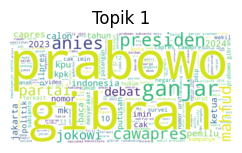

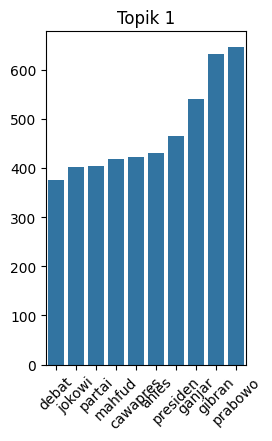

In [7]:
# Contoh penggunaan
data = pd.read_csv('data_pemilu_fix.csv')
num_topics = 1  # Jumlah topik yang diinginkan
top_n_words = 10  # Jumlah kata kunci untuk setiap topik

visualize_lda_topics(data, num_topics, top_n_words)

Dengan Topik 3 dan 10 top Keywords

Topik 1:
['mk', 'mkmk', 'hakim', 'anwar', 'putusan', 'konstitusi', 'anwar usman', 'usman', 'hakim konstitusi', 'etik']
Topik 2:
['prabowo', 'gibran', 'ganjar', 'presiden', 'anies', 'cawapres', 'mahfud', 'partai', 'jokowi', 'debat']
Topik 3:
['hamka aq', 'np', 'hamka', 'np 30', 'istri hamka', 'aq', 'sulungnya ad', 'kematian hamka', 'hamka np', 'rumah hamka']


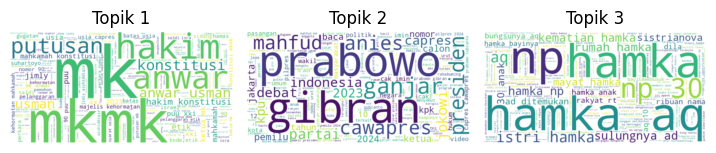

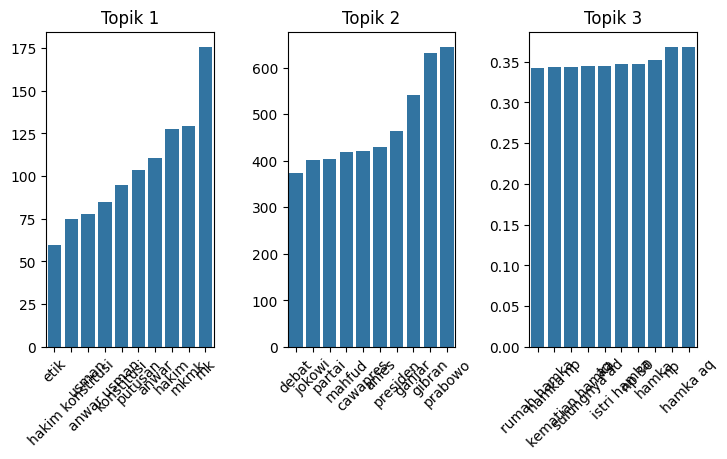

In [8]:
num_topics = 3  # Jumlah topik yang diinginkan
top_n_words = 10  # Jumlah kata kunci untuk setiap topik

visualize_lda_topics(data, num_topics, top_n_words)

Topik 1:
['mkmk', 'hakim', 'anwar', 'anwar usman', 'mk']
Topik 2:
['aiman', 'kebakaran', 'ijtima ulama', 'ijtima', 'damkar']
Topik 3:
['eddy', 'hiariej', 'eddy hiariej', 'ppatk', 'wamenkumham']
Topik 4:
['firli', 'kpk', 'syahrul', 'syl', 'limpo']
Topik 5:
['prabowo', 'gibran', 'ganjar', 'presiden', 'anies']


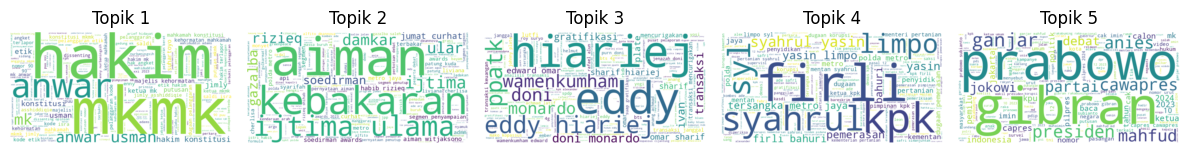

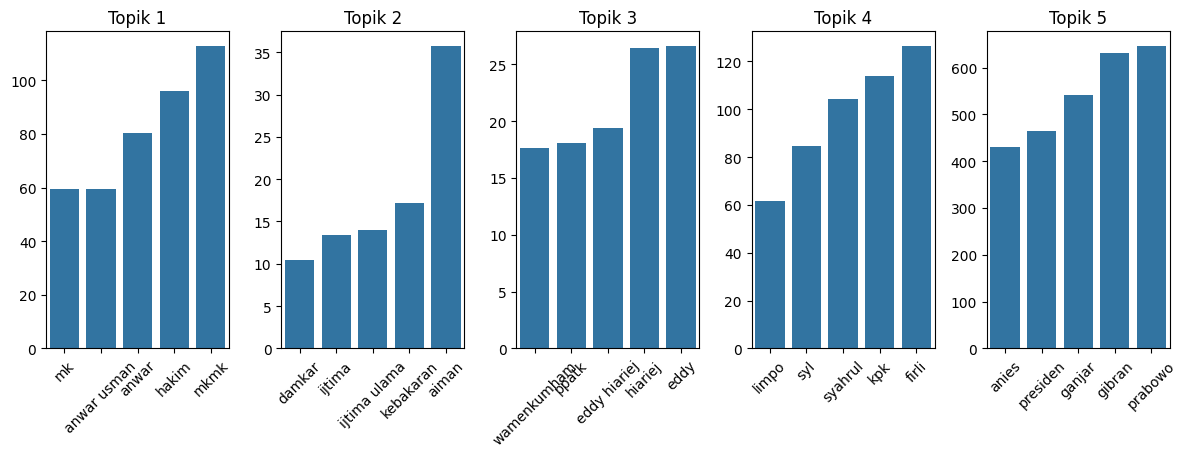

In [9]:
num_topics = 5  # Jumlah topik yang diinginkan
top_n_words = 5  # Jumlah kata kunci untuk setiap topik

visualize_lda_topics(data, num_topics, top_n_words)